<a href="https://colab.research.google.com/github/sr-DCBP/Data-Science/blob/main/CodingTask_Sabela%20Reuge3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 1

- Deadline (upload to Ilias): 2022-03-20 24:00
- Estimated effort: 2-5 hours
- Data on Ilias (4ms_...) with metadata file CCD-Metadata


## Tasks (maximum 12.5 points)

- Write a method (function) which removes the header information in the datafile and saves that information into a separate textfile. [0.5 points] 
- Write a function which reduces the data resolution by averaging over 1, 2, 3 and 4 nm wavelengths. Save these 4 new reduced datasets in new files. Do this (1) by writing an explicit loop and (2) by using pandas methods. Measure the running times of the two approaches. [6 points]
- Write a function which takes two wavelengths as input and plots the difference of the data at these lengths over time. [2 points] 
- Let the x-axis be in seconds, label the axes with names and units, label the plot with color and legend, make a title for the plot. Save the plot to a file. [2 points]
- Plot the full and the reduced datasets in the same figure. Is there any visual difference? [2 points]

In [28]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Data science/Absorbance.txt' 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import pandas as pd
df = pd.read_csv(path, delimiter='\t', header=13) # skip the metadata to get to the data (values)
df.to_csv('data-without-header')
df.head()



,Unnamed: 0,Unnamed: 1,316.6137,316.7492,316.8847,317.0203,317.1558,317.2913,317.4268,317.5623,...,778.9703,779.089,779.2076,779.3263,779.4449,779.5636,779.6822,779.8008,779.9194,780.0381
0,2018-10-25 10:32:04.789000,1540456324789,0.329672,0.329672,0.329672,0.090294,-0.716926,-1.829304,-0.686330,-0.428776,...,-0.038483,-0.039623,-0.036920,-0.037309,-0.037299,-0.037476,-0.036856,-0.036853,-0.039100,-0.035545
1,2018-10-25 10:32:04.878000,1540456324878,-0.044412,-0.044412,-0.044412,0.157632,-0.672423,-2.183981,-0.492421,-0.000000,...,-0.039428,-0.038486,-0.037309,-0.036357,-0.037289,-0.038728,-0.037214,-0.036902,-0.040210,-0.038165
2,2018-10-25 10:32:04.962000,1540456324962,0.338219,0.338219,0.338219,0.330993,-0.879836,-0.000000,-0.559845,-0.000000,...,-0.037725,-0.037534,-0.036560,-0.036152,-0.036554,-0.036875,-0.037351,-0.036746,-0.038686,-0.036903
3,2018-10-25 10:32:05.046000,1540456325046,-0.049682,-0.049682,-0.049682,0.519086,-0.681150,-0.000000,-0.417230,-0.000000,...,-0.037613,-0.037168,-0.036369,-0.034549,-0.036252,-0.037948,-0.036713,-0.035706,-0.038203,-0.036822
4,2018-10-25 10:32:05.129000,1540456325129,0.335086,0.335086,0.335086,-0.041393,-0.000000,-1.802774,-0.510417,-0.000000,...,-0.040919,-0.038288,-0.035840,-0.035638,-0.039504,-0.040093,-0.039953,-0.037656,-0.038082,-0.035900


In [ ]:
#df.iloc[2,1]
#dif = df.iloc[2,1] - df.iloc[1,1]
#print (dif)

#time_array = []
#for i in range (2,3650, 7):
#  ms = df.iloc[i+1] - df.iloc[i]
#  time_array.append(ms)
#  print (ms)

# try to make average of 1nm (7 values)

##import numpy as np

##def average(a, n) :
##    ret = np.cumsum(a, dtype=float)
##    ret[n:] = ret[n:] - ret[:-n]
##    return ret[n - 1:] / n

##data = np.array([5,4,3,2,10,11,13,14,15,16,19,7])

##print(average(data,1)) 


In [30]:
#Task 2 with pandas, reduce to 1 nm
#wavelength of all the measurements and their absorption
import numpy as np
import pandas as pd
def reduce_data_1nm():
  set1 = df.iloc[:,2:]
  print(set1)
  #average over 1 nm of all measurements, which is roughly 6 values
  m = 6
  a = np.array(set1)
  red_to_1nm = a.reshape(-1, m).mean(axis=1)
  print(red_to_1nm)
  #save data set in textfile
  np.savetxt('Reduced over 1nm.txt', red_to_1nm, delimiter = '\tab')
  content = np.loadtxt('Reduced over 1nm.txt')
  print(content)

reduce_data_1nm()

     316.6137  316.7492  316.8847  317.0203  317.1558  317.2913  317.4268  \
0    0.329672  0.329672  0.329672  0.090294 -0.716926 -1.829304 -0.686330   
1   -0.044412 -0.044412 -0.044412  0.157632 -0.672423 -2.183981 -0.492421   
2    0.338219  0.338219  0.338219  0.330993 -0.879836 -0.000000 -0.559845   
3   -0.049682 -0.049682 -0.049682  0.519086 -0.681150 -0.000000 -0.417230   
4    0.335086  0.335086  0.335086 -0.041393 -0.000000 -1.802774 -0.510417   
..        ...       ...       ...       ...       ...       ...       ...   
350 -0.048929 -0.048929 -0.048929 -0.052674 -0.739370 -2.155336 -0.520450   
351  0.851907  0.851907  0.851907 -0.111298 -0.639166 -2.039414 -0.531784   
352  0.329255  0.329255  0.329255  0.064351  0.316582 -2.107210 -0.298427   
353  0.330061  0.330061  0.330061  0.081473 -0.525273 -1.750123 -0.134352   
354  0.101879  0.101879  0.101879  0.177809 -0.456259 -0.000000 -0.157833   

     317.5623  317.6977  317.8332  ...  778.9703   779.089  779.2076  \
0  

In [5]:
#Task 2, reduce to 2 nm
#wavelength of all the measurements and their absorption
set1 = df.iloc[:,2:]
#print(set1)

#average over 2 nm of all measurements, which is roughly 12 values
m = 12
a = np.array(set1)
red_to_2nm = a.reshape(-1, m).mean(axis=1)
#print(red_to_1nm)

#save data set in textfile
np.savetxt('Reduced over 2nm.txt', red_to_2nm, delimiter = '\tab')
content = np.loadtxt('Reduced over 2nm.txt')
print(content)

[-0.0334605   0.044464    0.071475   ... -0.0368525  -0.03533767
 -0.03571342]


In [6]:
#Task 2, reduce to 3 nm
#wavelength of all the measurements and their absorption
set1 = df.iloc[:,2:]
#print(set1)

#average over 3 nm of all measurements, which is roughly 16 values
m = 16
a = np.array(set1)
red_to_3nm = a.reshape(-1, m).mean(axis=1)
#print(red_to_1nm)

#save data set in textfile
np.savetxt('Reduced over 3nm.txt', red_to_3nm, delimiter = '\tab')
content = np.loadtxt('Reduced over 3nm.txt')
print(content)

[-0.06078606  0.13089131  0.02636288 ... -0.03593125 -0.03648325
 -0.03543975]


In [7]:
#Task 2, reduce to 4 nm
#wavelength of all the measurements and their absorption
set1 = df.iloc[:,2:]
#print(set1)

#average over 4 nm of all measurements, which is roughly 24 values
m = 24
a = np.array(set1)
red_to_4nm = a.reshape(-1, m).mean(axis=1)
#print(red_to_1nm)

#save data set in textfile
np.savetxt('Reduced over 4nm.txt', red_to_4nm, delimiter = '\tab')
content = np.loadtxt('Reduced over 4nm.txt')
print(content)

[ 0.00550175  0.05881033 -0.11100413 ... -0.03696962 -0.03637729
 -0.03552554]


In [27]:
#Measure running time of pandas
%%timeit -n 10000 -r 5 
def reduce_data_1nm():
  set1 = df.iloc[:,2:]
  print(set1)
  #average over 1 nm of all measurements, which is roughly 6 values
  m = 6
  a = np.array(set1)
  red_to_1nm = a.reshape(-1, m).mean(axis=1)
  print(red_to_1nm)
  #save data set in textfile
  np.savetxt('Reduced over 1nm.txt', red_to_1nm, delimiter = '\tab')
  content = np.loadtxt('Reduced over 1nm.txt')
  print(content)

  reduce_data_1nm()



10000 loops, best of 5: 154 ns per loop


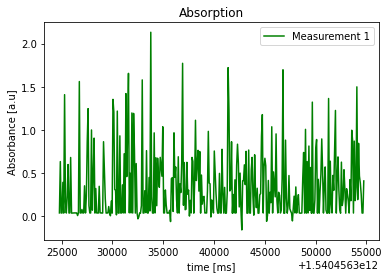

In [89]:
#Difference of 2 wavelengths over time and plot
import matplotlib.pyplot as plt
def diff_wavelength (wavelength1, wavelength2):
  df.columns[250] #wavelength 350nm
  df.columns[3398] #wavelength 750nm
  y_diff_wavelength = -(df.iloc[:,wavelength2] - df.iloc[:,wavelength1])
  #print(y_diff_wavelength)
  x_diff_wavelength = df.iloc[:,1]
  #print(x_diff_wavelength)
  plot = plt.plot(x_diff_wavelength, y_diff_wavelength, 'g', label = 'Measurement 1')
  plt.xlabel('time [ms]')
  plt.ylabel('Absorbance [a.u]')
  plt.title('Absorption')
  plt.legend()
  plt.savefig('Absorption.png')
diff_wavelength(250, 3648)

In [ ]:
import matplotlib.pyplot as plt
def diff_wavelength (wavelength1, wavelength2):
  wavelengths = df.iloc[:,:]
  abol = (wavelengths < wavelength1, wavelengths > wavelength2)
  abol
  n = np.where(abol)
  

  df.columns[250] #wavelength 350nm
  df.columns[3398] #wavelength 750nm
  y_diff_wavelength = -(df.iloc[:,wavelength2] - df.iloc[:,wavelength1])
  #print(y_diff_wavelength)
  x_diff_wavelength = df.iloc[:,1]
  #print(x_diff_wavelength)
  plot = plt.plot(x_diff_wavelength, y_diff_wavelength, 'g', label = 'Measurement 1')
  plt.xlabel('time [ms]')
  plt.ylabel('Absorbance [a.u]')
  plt.title('Absorption')
  plt.legend()
  plt.savefig('Absorption.png')
diff_wavelength(250, 3648)

In [94]:
def diff_wavelength (wavelength1, wavelength2):
  wavelengths = df.iloc[:,:]
  wavelengths_float = wavelengths.astype(np.float)
  abol = (wavelengths_float < wavelength1, wavelengths_float > wavelength2)
  abol
  n = np.where(abol)
diff_wavelength (350, 750)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: ignored

In [ ]:
df.iloc[2,1]
dif = df.iloc[2,1] - df.iloc[1,1]
print (dif)

time_array = []
for i in range (2,3650, 7):
  ms = df.iloc[i+1] - df.iloc[i]
  time_array.append(ms)
  print (ms)
  

84


TypeError: ignored

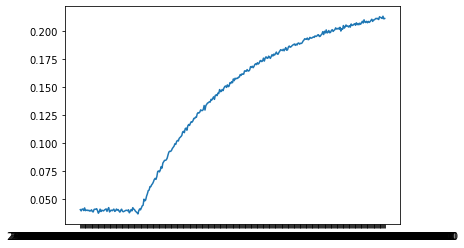

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = df.iloc[:,0]
y = -(df.iloc[:,1950]-df.iloc[:,1800])
plt.plot(x,y)

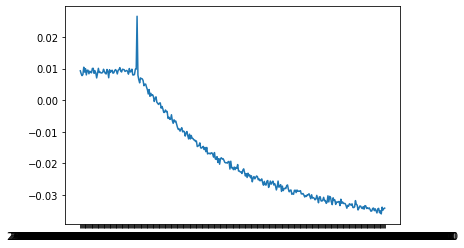

In [ ]:
import matplotlib.pyplot as plt
x = df.iloc[:,0]
y = df.iloc[:,1950]
plt.plot(x,y)

In [ ]:
df.columns[2]

'316.6137'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Columns: 3650 entries, Unnamed: 0 to 780.0381
dtypes: float64(3648), int64(1), object(1)
memory usage: 9.9+ MB


In [ ]:
df.to_csv('data-without-header')

#def removeheader (N):
#  with open("Textfile.txt","w") as textfile:
 #   file.write(#jetzt pfad zu header von Absorption file)



AttributeError: ignored

In [ ]:
#header = (' ')
#with open('Textfile.txt', 'w') as outstream:
 #    outstream.write(header)

In [ ]:
with open(path, 'r') as instream:
    print(instream.readline())
    print(instream.readline())
    print(instream.readline())

Data from 4ms_10 av_15 s_Absorbance_10-32-04-868.txt Node



Date: Thu Oct 25 10:32:04 CEST 2018



In [ ]:
def copyheader ():# works but does it saves the wright thing?
  header = ''
with open(path, 'r') as instream:
     textlines = instream.readlines()
for i in range(14):
     print(textlines[i])

Data from 4ms_10 av_15 s_Absorbance_10-32-04-868.txt Node



Date: Thu Oct 25 10:32:04 CEST 2018

User: Christoph

Spectrometer: BALLMOOS

Trigger mode: 4

Integration Time (sec): 4.000000E-3

Scans to average: 10

Electric dark correction enabled: true

Nonlinearity correction enabled: false

Boxcar width: 0

XAxis mode: Wavelengths

Number of Pixels in Spectrum: 3648

>>>>>Begin Spectral Data<<<<<



In [ ]:
def copyheader ():
  header = '' 
with open(path, 'r') as instream:
     textlines = instream.readlines()
for i in range(14):
     header= header + str(textlines[i])
print(header)

>>>>>Begin Spectral Data<<<<<
Data from 4ms_10 av_15 s_Absorbance_10-32-04-868.txt Node

Date: Thu Oct 25 10:32:04 CEST 2018
User: Christoph
Spectrometer: BALLMOOS
Trigger mode: 4
Integration Time (sec): 4.000000E-3
Scans to average: 10
Electric dark correction enabled: true
Nonlinearity correction enabled: false
Boxcar width: 0
XAxis mode: Wavelengths
Number of Pixels in Spectrum: 3648
>>>>>Begin Spectral Data<<<<<
Data from 4ms_10 av_15 s_Absorbance_10-32-04-868.txt Node

Date: Thu Oct 25 10:32:04 CEST 2018
User: Christoph
Spectrometer: BALLMOOS
Trigger mode: 4
Integration Time (sec): 4.000000E-3
Scans to average: 10
Electric dark correction enabled: true
Nonlinearity correction enabled: false
Boxcar width: 0
XAxis mode: Wavelengths
Number of Pixels in Spectrum: 3648
>>>>>Begin Spectral Data<<<<<
Data from 4ms_10 av_15 s_Absorbance_10-32-04-868.txt Node

Date: Thu Oct 25 10:32:04 CEST 2018
User: Christoph
Spectrometer: BALLMOOS
Trigger mode: 4
Integration Time (sec): 4.000000E-3
Scan

In [ ]:
headerfile = open("Header.txt", 'w+')
headerfile.write(header)
headerfile.close()

In [ ]:
with open('Header.txt', 'r') as instream:
  print(instream.readline())
  print(instream.readline())
  print(instream.readline())



>>>>>Begin Spectral Data<<<<<





In [ ]:
df = pd.read_csv(path, delimiter='\t', header = 13)

In [ ]:
data = open("Absorbance.txt", "r")

for line in data.readlines():
    print(line)
data.close()

In [ ]:
# open the sample file used
data = open('Absorbance.txt', 'r')
  
# read the content of the file opened
content = data.readlines()
  
# read 10th line from the file
print("tenth line")
print(content[9])
  
# print first 3 lines of file
print("first three lines")
print(content[0:3])

tenth line


IndexError: ignored

In [ ]:
data = open('Absorbance.txt', 'r')
sep = data.read(20 - 0)
print (sep)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Data science/Absorbance.txt' 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = open('Absorbance.txt', 'r')
sep = data.read(20 - 0)
print (sep)

In [ ]:
data.seek(5)
sep = data.read(20 - 5)
print (sep)